
## <center> Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline), Data Scientist at Mail.ru Group <br>
    All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #6 (demo)
## <center>  Exploring OLS, Lasso and Random Forest in a regression task
    
<img src='../img/wine_quality.jpg' width=30%>

**Fill in the missing code and choose answers in [this](https://docs.google.com/forms/d/1aHyK58W6oQmNaqEfvpLTpo6Cb0-ntnvJ18rZcvclkvw/edit) web form.**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

**We are working with UCI Wine quality dataset (no need to download it – it's already there, in repo and in Kaggle Dataset).**

In [2]:
data = pd.read_csv('../data/winequality-white.csv', sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Separate the target feature, split data in 7:3 proportion (30% form a holdout set, use random_state=17), and preprocess data with `StandardScaler`.**

In [5]:
y = data['quality'] # you code here

X_train, X_holdout, y_train, y_holdout = train_test_split(data.drop(['quality'], axis=1),
                                                          y, test_size=0.3, random_state=17) # you code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # you code here
X_holdout_scaled = scaler.transform(X_holdout) # you code here

## Linear regression

**Train a simple linear regression model (Ordinary Least Squares).**

In [6]:
linreg = LinearRegression() # you code here
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**<font color='red'>Question 1:</font> What are mean squared errors of model predictions on train and holdout sets?**

In [7]:
train_preds = linreg.predict(X_train_scaled)
mse_train = mean_squared_error(train_preds, y_train)
print('Mean squared error (train): {:.3f}'.format(mse_train)) # you code here
test_preds = linreg.predict(X_holdout_scaled)
mse_test = mean_squared_error(test_preds, y_holdout)
print('Mean squared error (test): {:.3f}'.format(mse_test)) # you code here

Mean squared error (train): 0.558
Mean squared error (test): 0.584


**Sort features by their influence on the target feature (wine quality). Beware that both large positive and large negative coefficients mean large influence on target. It's handy to use `pandas.DataFrame` here.**

**<font color='red'>Question 2:</font> Which feature this linear regression model treats as the most influential on wine quality?**

In [8]:
linreg_coef = pd.DataFrame(data=linreg.coef_,
                           columns=['coef'],
                           index=data.columns.drop('quality'))
linreg_coef['abs_coef'] = np.abs(linreg_coef['coef']) # you code here
linreg_coef.sort_values(by='abs_coef', ascending=False)['abs_coef'].plot(kind='bar'); # you code here

## Lasso regression

**Train a LASSO model with $\alpha = 0.01$ (weak regularization) and scaled data. Again, set random_state=17.**

In [9]:
lasso1 = Lasso(alpha=0.01, random_state=17) # you code here
lasso1.fit(X_train_scaled, y_train) # you code here

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)

**Which feature is the least informative in predicting wine quality, according to this LASSO model?**

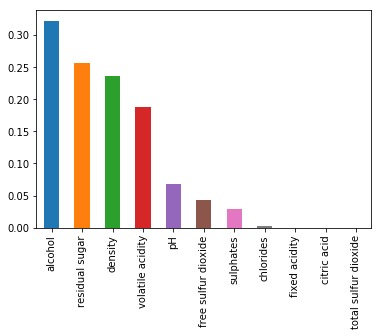

In [10]:
lasso1_coef = pd.DataFrame(data=lasso1.coef_,
                           columns=['coef'],
                           index=data.columns.drop('quality'))
lasso1_coef['abs_coef'] = np.abs(lasso1_coef['coef']) # you code here
lasso1_coef.sort_values(by='abs_coef', ascending=False)['abs_coef'].plot(kind='bar'); # you code here

**Train LassoCV with random_state=17 to choose the best value of $\alpha$ in 5-fold cross-validation.**

In [11]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, cv=5, n_jobs=-1,
                   verbose=True, random_state=17) # you code here
lasso_cv.fit(X_train_scaled, y_train) # you code here

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=array([1.00000e-06, 1.09699e-06, ..., 9.11589e+01, 1.00000e+02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=-1, normalize=False, positive=False,
    precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
    verbose=True)

In [12]:
lasso_cv.alpha_

0.0002833096101839324

**<font color='red'>Question 3:</font> Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?**

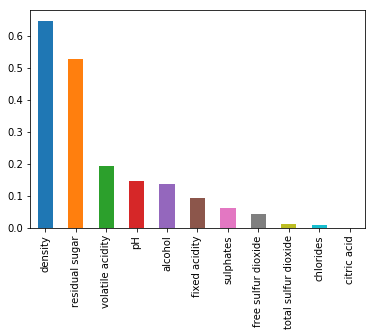

In [13]:
lasso_cv_coef = pd.DataFrame(data=lasso_cv.coef_,
                             columns=['coef'],
                             index=data.columns.drop('quality'))# you code here
lasso_cv_coef['abs_coef'] = np.abs(lasso_cv_coef['coef']) # you code here
lasso_cv_coef.sort_values(by='abs_coef', ascending=False)['abs_coef'].plot(kind='bar'); # you code here

**<font color='red'>Question 4:</font> What are mean squared errors of tuned LASSO predictions on train and holdout sets?**

In [14]:
train_preds = lasso_cv.predict(X_train_scaled)
mse_train = mean_squared_error(train_preds,y_train)
print('Mean squared error (train): {:.3f}'.format(mse_train)) # you code here
test_preds = lasso_cv.predict(X_holdout_scaled)
mse_test = mean_squared_error(test_preds,y_holdout)
print('Mean squared error (test): {:.3f}'.format(mse_test)) # you code here

Mean squared error (train): 0.558
Mean squared error (test): 0.583


## Random Forest

**Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.**

In [15]:
forest = RandomForestRegressor(random_state=17) # you code here
forest.fit(X_train_scaled, y_train) # you code here

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

**<font color='red'>Question 5:</font> What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [16]:
train_preds = forest.predict(X_train_scaled)
mse_train = mean_squared_error(train_preds, y_train)
print("Mean squared error (train): {:.3f}".format(mse_train)) # you code here
scores = cross_val_score(forest, X_train_scaled, y_train,
                         scoring='neg_mean_squared_error')
print("Mean squared error (cv): {:.3f}".format(abs(np.mean(scores)))) # you code here
test_preds = forest.predict(X_holdout_scaled)
mse_test = mean_squared_error(test_preds, y_holdout)
print("Mean squared error (train): {:.3f}".format(mse_test)) # you code here

Mean squared error (train): 0.075
Mean squared error (cv): 0.460
Mean squared error (train): 0.421


**Tune the `max_features` and `max_depth` hyperparameters with GridSearchCV and again check mean cross-validation MSE and MSE on holdout set.**

In [17]:
forest_params = {'max_depth': list(range(10, 25)), 
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

locally_best_forest = GridSearchCV(estimator=forest, cv=5,
                                   param_grid=forest_params,
                                   scoring='neg_mean_squared_error',
                                   verbose=True, n_jobs=-1,
                                   return_train_score=False) # you code here
locally_best_forest.fit(X_train_scaled, y_train) # you code here

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7], 'max_features': [6, 7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=True)

In [18]:
locally_best_forest.best_params_, abs(locally_best_forest.best_score_)

({'max_depth': 19, 'max_features': 7, 'min_samples_leaf': 1},
 0.4346879383644381)

**<font color='red'>Question 6:</font> What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [19]:
best_forest = locally_best_forest.best_estimator_
scores = cross_val_score(best_forest,
                         X_train_scaled, y_train,
                         scoring='neg_mean_squared_error')
print("Mean squared error (cv): {:.3f}".format(abs(np.mean(scores)))) # you code here
test_preds = best_forest.predict(X_holdout_scaled)
mse_test = mean_squared_error(test_preds, y_holdout)
print("Mean squared error (test): {:.3f}".format(mse_test))# you code here

Mean squared error (cv): 0.457
Mean squared error (test): 0.410


**Output RF's feature importance. Again, it's nice to present it as a DataFrame.**<br>
**<font color='red'>Question 7:</font> What is the most important feature, according to the Random Forest model?**

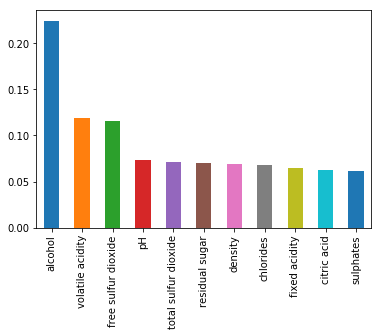

In [20]:
rf_importance = pd.DataFrame(data=locally_best_forest.best_estimator_.feature_importances_,
                             columns=['coef'],
                             index=data.columns.drop('quality')) # you code here
rf_importance.sort_values(by='coef', ascending=False)['coef'].plot(kind='bar'); # you code here

**Make conclusions about the performance of the explored 3 models in this particular prediction task.**